<div class="alert alert-block alert-success">
    <b><center>Perceptron</center></b>
</div>

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql

In [2]:
import rspy as rsp

# AND/OR 연산 함수

In [3]:
# AND 연산
def exAnd(x1, x2):
    if x1 == x2 == 1:
        return 1
    else:
        return 0

In [4]:
rsp.printMulti(
    exAnd(0, 0), exAnd(0, 1), exAnd(1, 0), exAnd(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [5]:
# OR 연산
def exOr(x1, x2):
    if x1 == x2 == 0:
        return 0
    else:
        return 1

In [6]:
rsp.showMulti(
    exOr(0, 0), exOr(0, 1), exOr(1, 0), exOr(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [7]:
# XOR 연산
def exXor(x1, x2):
    if x1 == x2:
        return 0
    else:
        return 1

In [8]:
rsp.showMulti(
    exXor(0, 0), exXor(0, 1), exXor(1, 0), exXor(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [9]:
# CELL 구성
import enum
class OP(enum.Enum):
    AND = 0
    OR  = 1
    XOR = 2

In [10]:
OP.AND.value

0

In [11]:
def cell(x1, x2, operator=OP.AND):
    result = 0
    if operator == OP.AND:
        result = 1 if x1 == x2 == 1 else 0
    if operator == OP.OR:
        result = 0 if x1 == x2 == 0 else 1
    if operator == OP.XOR:
        result = 0 if x1 == x2 else 1
    return result

In [12]:
rsp.showMulti(
    "AND", "OR", "XOR",
    cell(0, 0), cell(0, 0, OP.OR), cell(0, 0, OP.XOR),
    cell(0, 1), cell(0, 1, OP.OR), cell(0, 1, OP.XOR),
    cell(1, 0), cell(1, 0, OP.OR), cell(1, 0, OP.XOR),
    cell(1, 1), cell(1, 1, OP.OR), cell(1, 1, OP.XOR),
    colSize=3, width="30%"
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [13]:
class Cell(object):
    def __init__(self, operator=OP.AND):
        self._operator = operator
        self._op = [self.doAnd, self.doOr, self.doXor]
        
    def doAnd(self, x1, x2):
        return 1 if x1 == x2 == 1 else 0
    
    def doOr(self, x1, x2):
        return 0 if x1 == x2 == 0 else 1
    
    def doXor(self, x1, x2):
        return 0 if x1 == x2 else 1
    
    def do(self, x1, x2):
        doFunction = self._op[self._operator.value]
        return doFunction(x1, x2)
    
    def __repr__(self):
        return f"Cell[operator:{self._operator}]"

In [14]:
clsCell = Cell(OP.AND)
clsCell.do(1, 0)

0

In [15]:
clsCell = Cell(OP.OR)
clsCell.do(1, 0)

1

# Perceptron Cell

In [6]:
def cell(x1, x2, w1=0.5, w2=0.5, threshold=0.6):
    weightSum = x1*w1 + x2*w2
    return 0 if weightSum < threshold else 1

In [9]:
THRESHOLD1 = 0.6
THRESHOLD2 = 0.4
rsp.printMulti(
    "AND", "OR",
    cell(0, 0, threshold=THRESHOLD1), cell(0, 0, threshold=THRESHOLD2),
    cell(0, 1, threshold=THRESHOLD1), cell(0, 1, threshold=THRESHOLD2),
    cell(1, 0, threshold=THRESHOLD1), cell(1, 0, threshold=THRESHOLD2),
    cell(1, 1, threshold=THRESHOLD1), cell(1, 1, threshold=THRESHOLD2),
    colSize=2, width="30%"
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [18]:
def cell(x1, x2, w1=0.5, w2=0.5, bias=0.5):
    weightSum = x1*w1 + x2*w2 - bias
    return 0 if weightSum <= 0 else 1

In [19]:
BIAS1 = 0.6
BIAS2 = 0.4
rsp.showMulti(
    "AND", "OR",
    cell(0, 0, bias=BIAS1), cell(0, 0, bias=BIAS2),
    cell(0, 1, bias=BIAS1), cell(0, 1, bias=BIAS2),
    cell(1, 0, bias=BIAS1), cell(1, 0, bias=BIAS2),
    cell(1, 1, bias=BIAS1), cell(1, 1, bias=BIAS2),
    colSize=2, width="30%"
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# numpy & Vector

In [20]:
import numpy as np

2개의 백터 $a=\begin{bmatrix}1\\2\end{bmatrix}, b=\begin{bmatrix}2\\1\end{bmatrix} $ 가 있을 때<br>
$a+b=\begin{bmatrix}3\\3\end{bmatrix}, a-b=\begin{bmatrix}-1\\1\end{bmatrix}, a\times b=\begin{bmatrix}2\\2\end{bmatrix}, a\div b=\begin{bmatrix}0.5\\2\end{bmatrix}, a\times 2=\begin{bmatrix}2\\4\end{bmatrix}$

In [21]:
a = np.array([1, 2])
b = np.array([2, 1])
rsp.showMulti(a+b, a-b, a*b, a/b, a*2)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [22]:
plotConf = rsp.EduPlotConf(figScale=1.5)
plot = rsp.EduPlot2D(plotConf)

In [23]:
def sumAB():
    plot.addVector([a, b])
    plot.addVector([a+b], color="#FF0000", name="sum")
    plot.addVector([b], [a], color="#00FF00", name="alpa")
    plot.addText([a+b], ["a+b"])
    return plot.genSpaceFigure([-2,5], [-2,5])

In [24]:
def subAB():
    plot.clear()
    plot.addVector([a, b])
    plot.addVector([a-b], color="#FF0000", name="sub")
    plot.addVector([a-b], [b], color="#00FF00", name="alpa")
    plot.addText([a-b], ["a-b"])
    return plot.genSpaceFigure([-2,5], [-2,5])

In [25]:
def scale2A():
    plot.clear()
    plot.addVector([a, 2*a])
    plot.addText([2*a], ["2a"])
    return plot.genSpaceFigure([-2,5], [-2,5])

In [26]:
rsp.showMulti(sumAB(), subAB(), scale2A())

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

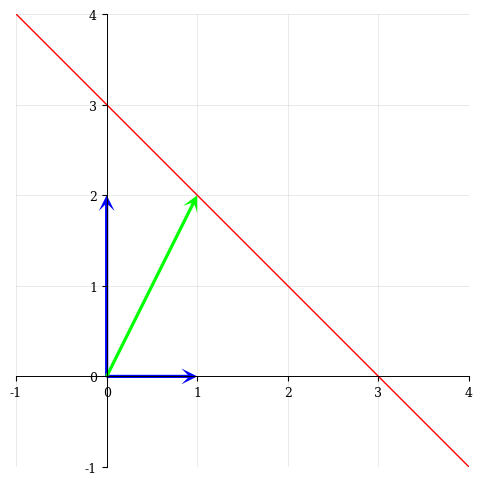

In [27]:
linX = np.array([1,0])
linY = np.array([0,2])

plot.clear()
plot.addFunction("-x+3")
plot.addVector([linX, linY])
plot.addVector([linX+linY], color="#00FF00", name="alpa")
plot.genSpace([-1,4], [-1,4])

# Matrix

In [28]:
base = np.identity(2)
base

array([[1., 0.],
       [0., 1.]])

In [29]:
base = [
    [1, 0],
    [0, 1]
]
test = np.array([1, 1])

In [30]:
transX = [
    [1, 0],
    [0.3, 1]
]
transY = [
    [1, -0.3],
    [0, 1]
]
trans = [
    [1, -0.3],
    [0.3, 1]
]

In [31]:
plot.clear()
plot.addFunction("-x+2")
plot.addVector(base, name="base")
plot.addVector([test], [(-1, -1)], "test", "#00FF00")

In [32]:
rsp.showMulti(
    plot.genSpaceFigure(4, 4, "Unit Vector"),
    plot.genSpaceFigure(4, 4, "Transformation X", transX),
    plot.genSpaceFigure(4, 4, "Transformation Y", transY),
    plot.genSpaceFigure(4, 4, "Transformation", trans)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

# Learning

In [33]:
import numpy as np

In [34]:
datas = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
labels = [0, 1, 0, 1]

In [35]:
class Learning(object):
    def __init__(self, learningRate=0.1):
        self.learningRate = learningRate
        self.bias = 0.5
        self.w = np.random.rand(2)
        self.errors = []
        
    def fit(self, data, label):
        predicted = self.prediction(data)
        error = self._loss(predicted, label)
        self.errors.append(error)
        optimize = self._optimizer(self.learningRate,  error)
    
    def _hypothesis(self, data, weight, bias):
        return np.matmul(data, weight) - bias
            
    def _loss(self, predicted, label):
        errors = 0
        for label, pred in zip(label, predicted):
            errors += label - pred
        return errors / len(predicted)
    
    def _optimizer(self, learningRate, error):
        update = learningRate * error
        self.w += update
    
    def prediction(self, data):
        production = self._hypothesis(data, self.w, self.bias)
        return np.where(production <= 0, 0, 1)

In [36]:
learng = Learning(0.1)

In [37]:
for _ in range(50):
    learng.fit(np.array(datas), np.array(labels))

In [38]:
learng.prediction(np.array(datas))

array([0, 0, 1, 1])

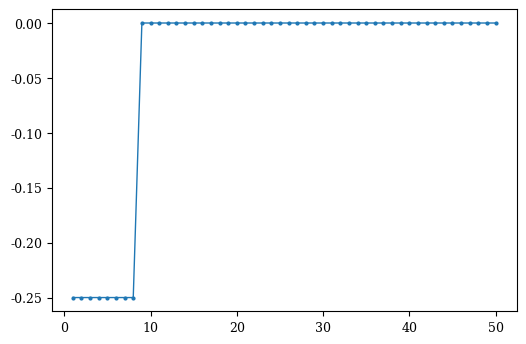

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(learng.errors)+1), learng.errors, marker=".")
plt.show()

# 퍼셉트론 한계 극보

In [40]:
# AND
rsp.showMulti(
    cell(0, 0, w1=0.5, w2=0.5, bias=0.5),
    cell(0, 1, w1=0.5, w2=0.5, bias=0.5),
    cell(1, 0, w1=0.5, w2=0.5, bias=0.5),
    cell(1, 1, w1=0.5, w2=0.5, bias=0.5),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [41]:
# OR
rsp.showMulti(
    cell(0, 0, w1=0.5, w2=0.5, bias=0.4),
    cell(0, 1, w1=0.5, w2=0.5, bias=0.4),
    cell(1, 0, w1=0.5, w2=0.5, bias=0.4),
    cell(1, 1, w1=0.5, w2=0.5, bias=0.4),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [42]:
# NAND
rsp.showMulti(
    cell(0, 0, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(0, 1, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(1, 0, w1=-0.5, w2=-0.5, bias=-0.6),
    cell(1, 1, w1=-0.5, w2=-0.5, bias=-0.6),
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [43]:
def cellXOR(x1, x2):
    resultNAND = cell(x1, x2, w1=-0.5, w2=-0.5, bias=-0.6)
    resultOR   = cell(x1, x2, w1=0.5, w2=0.5, bias=0.4)
    return cell(resultNAND, resultOR, w1=0.5, w2=0.5, bias=0.5)

In [44]:
# XOR
rsp.showMulti(
    cellXOR(0, 0),
    cellXOR(0, 1),
    cellXOR(1, 0),
    cellXOR(1, 1)
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…